# `pc_to_satn`
Convert a capillary pressure map to saturation map.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
ps.visualization.set_mpl_style()

The arguments and their defaults are:

In [2]:
import inspect
inspect.signature(ps.filters.pc_to_satn)

<Signature (pc, im)>

The capillary pressure map, such as that computed by ``ps.simulations.drainage``

In [3]:
im = ps.generators.blobs(shape=[200, 200], porosity=0.6)
drn = ps.simulations.drainage(im=im, voxel_size=1, g=0)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

## `pc` and `im`

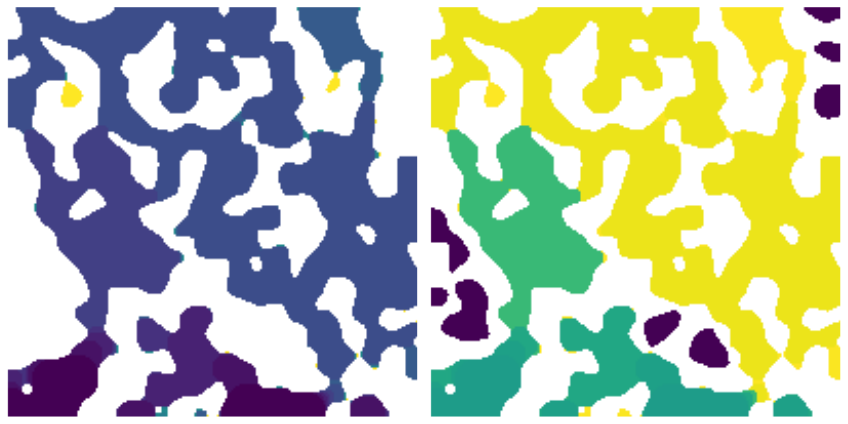

In [4]:
satn = ps.filters.pc_to_satn(pc=drn.im_pc, im=im)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(drn.im_pc/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(satn/im, interpolation='none', origin='lower')
ax[1].axis(False);

The saturation image allows for easy determination of a desired fluid configuration:

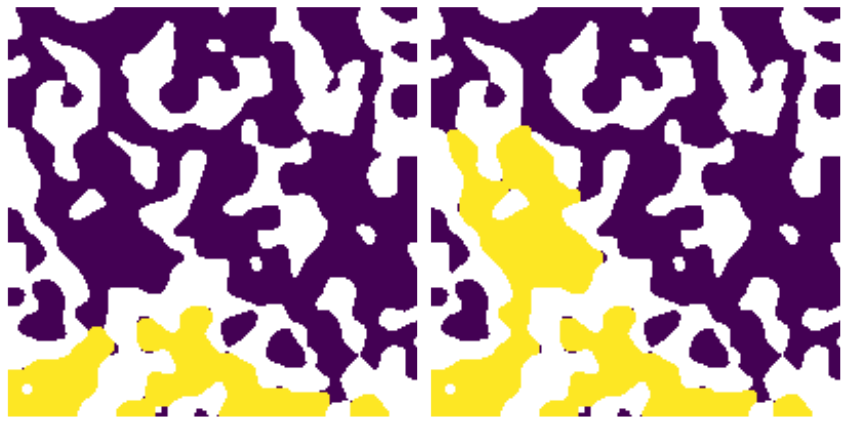

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow((satn < 0.3)*(satn > 0)/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow((satn < 0.8)*(satn > 0)/im, interpolation='none', origin='lower')
ax[1].axis(False);